In [197]:
import numpy as np
import matplotlib.pyplot as plt

https://fr.wikipedia.org/wiki/K-moyennes

In [198]:
# 2D Points Dataset
x = np.array([1,0,2.5,6,1,8,3,0,3,9,8,4,5,6])
y = np.array([1,4,7,2,3,4,7,2,6,1,3,6,7,4.5])

n = x.shape[0] #Nb of points

k=4 # Nb of clusters    k<n

points = np.array([x,y])
points=points.T
# n 2D points 

### Euclidean distance calculation
Entre chaque point et chaque position moyenne

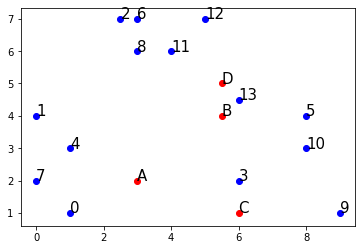

In [199]:
a = np.random.randint(low=0,high=20,size=(k,2))/2 #Generate random points 

plt.scatter(x,y,color='blue')
plt.scatter(a[:,0],a[:,1],color='red')

for i in range(0,n): 
    plt.text(x[i], y[i], str(i), fontsize=15)
    
for i in range(0,k): 
    plt.text(a[i,0],a[i,1], chr(i+65), fontsize=15)

In [200]:
points=np.broadcast_to(points,(k,14,2)) 
print(points.shape) # (k,n,2)

c = []
for i in range(0,k):    #Need to find a numpy way to do this to avoid loops
    c.append(np.broadcast_to(a[i],(n,2)))
    
c = np.array(c)
print(c.shape) # (k,n,2)

(4, 14, 2)
(4, 14, 2)


In [201]:
d = np.linalg.norm(points-c,axis=2) # Euclidean Distance
d.shape # (k,n) because distance is a scalar here

(4, 14)

In [202]:
args=np.argmin(d,axis=0) #For each point get the argument of the minimum distance
args

array([0, 0, 3, 2, 0, 1, 3, 0, 3, 2, 1, 3, 3, 1], dtype=int64)

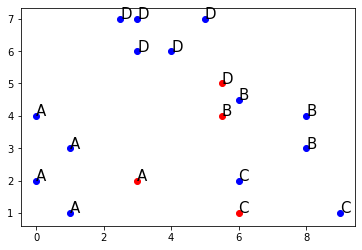

In [203]:
plt.scatter(x,y,color='blue')
plt.scatter(a[:,0],a[:,1],color='red')
for i in range(0,n): 
    plt.text(x[i], y[i], chr(args[i]+65), fontsize=15)
for i in range(0,k): 
    plt.text(a[i,0],a[i,1], chr(i+65), fontsize=15)

In [204]:
km = np.array([x,y]) #Points
new_m=np.zeros((k,2))
for i in range(0,k):
    new_m[i]=np.mean(km[:,args==i],axis=1) #Calcul of new k using the mean coordinates
new_m  

array([[0.5       , 2.5       ],
       [7.33333333, 3.83333333],
       [7.5       , 1.5       ],
       [3.5       , 6.6       ]])

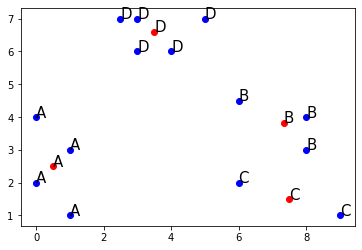

In [205]:
plt.scatter(x,y,color='blue')
plt.scatter(new_m[:,0],new_m[:,1],color='red')
for i in range(0,n): 
    plt.text(x[i], y[i], chr(args[i]+65), fontsize=15)
for i in range(0,k): 
    plt.text(new_m[i,0],new_m[i,1], chr(i+65), fontsize=15)